# **1. Perkenalan Dataset**


**Nama Dataset**  
Ionosphere

**Sumber**  
UCI Machine Learning Repository  
https://archive.ics.uci.edu/ml/datasets/Ionosphere

**Deskripsi Singkat**  
Dataset ini berisi hasil pantulan gelombang radar terhadap ionosfer yang dikumpulkan di Goose Bay, Labrador. Sistem radar memanfaatkan phased array 16 antena frekuensi tinggi (total daya ~6,4 kW) dan merekam sinyal kompleks melalui fungsi autokorelasi untuk 17 pulsa. Setiap pulsa menghasilkan dua atribut (real & imaginary), sehingga total 34 fitur numerik per sampel. Target (“good” vs. “bad”) menunjukkan apakah pantulan menunjukkan struktur di ionosfer atau tidak.

**Karakteristik Data**  
- Jumlah sampel: 351  
- Jumlah fitur: 34 (kontinu, tidak ada missing values)  
- Atribut target:  
  • “good” (terdapat struktur)  
  • “bad” (tidak terdapat struktur)

In [ ]:
%pip install ucimlrepo

# **2. Import Library**

In [ ]:
# 1. Fetch dan manipulasi data
from ucimlrepo import fetch_ucirepo
import pandas as pd

# 2. Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocessing
from sklearn.preprocessing import StandardScaler

# 4. Split data
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, saya memuat dataset **Ionosphere** dari UCI Machine Learning Repository ke dalam notebook. Langkah ini memastikan data telah diunduh dengan benar, kolom sudah sesuai dokumentasi, dan struktur data siap untuk analisis lebih lanjut.


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

# metadata
print(ionosphere.metadata)

# variable information
print(ionosphere.variables)

{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

## **Insights:**

Berdasarkan output `ionosphere.metadata`, kita mendapatkan gambaran umum tentang dataset:

- **ID & Nama**  
  • `uci_id`: 52  
  • `name`: “Ionosphere”  
- **Sumber & URL**  
  • Repository: UCI ML Repository  
  • Data CSV mentah di `data_url`: ~100 KB  
- **Domain & Tugas**  
  • Area: Physics and Chemistry  
  • Tugas: Binary **Classification** (deteksi struktur di ionosfer)  
- **Karakteristik**  
  • Multivariate  
  • 351 instances, 34 fitur  
  • Tipe fitur: Integer & Real  
  • **Tanpa missing values** (“no”)  
- **Target**  
  • Kolom `Class`: “g” (good) vs “b” (bad)  
- **Sejarah & Kredibilitas**  
  • Dibuat 1989 (V. Sigillito dkk.)  
  • Ringkas dan terbukti bertahun-tahun sebagai benchmark tugas radar/ionosfer  

---

## Insights dari Variable Information

Tabel `ionosphere.variables` menegaskan:

| Nama Kolom   | Peran    | Tipe       | Missing? |
|--------------|----------|------------|----------|
| Attribute1–34| Fitur    | Continuous | no       |
| Class        | Target   | Categorical| no       |

- **Semua 34 fitur** berskala kontinu – tidak ada encoding string yang rumit.  
- **Target** berupa kategori “good”/“bad” → perlu mapping ke 1/0.  
- Tidak ada kolom `index`; setiap baris adalah sampel independen.  

---

## **Ekspor Dataset ke CSV**

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# 1. Fetch dataset dari UCI
ionosphere = fetch_ucirepo(id=52)
X = ionosphere.data.features
y = ionosphere.data.targets

# 2. Gabungkan fitur dan target dalam satu DataFrame
# Access the 'Class' column from the y DataFrame
df = pd.concat([
    X.reset_index(drop=True),
    y['Class'].reset_index(drop=True) # Access the 'Class' column
], axis=1)

# 3. Simpan ke CSV tanpa index
csv_path = "ionosphere.csv"
df.to_csv(csv_path, index=False)
print(f"✅ Dataset disimpan di: {csv_path}")

✅ Dataset disimpan di: ionosphere.csv


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, saya melakukan eksplorasi awal untuk memahami struktur data, distribusi setiap fitur, serta keseimbangan kelas target.

In [ ]:
# 4.1 Informasi DataFrame
print("Info DataFrame:")
df.info()

# 4.1 Ringkasan Statistik Numerik
print("\nStatistik Deskriptif:")
display(df.describe().T)


Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute1   351 non-null    int64  
 1   Attribute2   351 non-null    int64  
 2   Attribute3   351 non-null    float64
 3   Attribute4   351 non-null    float64
 4   Attribute5   351 non-null    float64
 5   Attribute6   351 non-null    float64
 6   Attribute7   351 non-null    float64
 7   Attribute8   351 non-null    float64
 8   Attribute9   351 non-null    float64
 9   Attribute10  351 non-null    float64
 10  Attribute11  351 non-null    float64
 11  Attribute12  351 non-null    float64
 12  Attribute13  351 non-null    float64
 13  Attribute14  351 non-null    float64
 14  Attribute15  351 non-null    float64
 15  Attribute16  351 non-null    float64
 16  Attribute17  351 non-null    float64
 17  Attribute18  351 non-null    float64
 18  Attribute19  351 non-null    float

,count,mean,std,min,25%,50%,75%,max
Attribute1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
Attribute2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
Attribute3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
Attribute4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
Attribute5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
Attribute6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
Attribute7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
Attribute8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
Attribute9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
Attribute10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


## **Insights:**

Berdasarkan `df.info()` dan `df.describe().T`, berikut beberapa poin penting yang perlu dipahami:

1. Struktur Data  
   - Terdapat **351 baris** dan **35 kolom** (34 fitur + 1 kolom `Class`).  
   - **Tipe kolom**:  
     • 2 kolom `int64` (Attribute1, Attribute2)  
     • 32 kolom `float64` (Attribute3–Attribute34)  
     • 1 kolom `object` (`Class`)  
   - **Tidak ada missing values** pada seluruh kolom, memastikan kita tidak perlu imputasi.  
   - Memory footprint hanya ~96 KB

2. Atribut “Attribute2”  
   - Dari statistik:  
     • **mean = 0**, **std = 0**, **min = max = 0**  
   - Artinya kolom ini **konstan** dan tidak membawa informasi apa-apa → sebaiknya di-drop sebelum modelling.

3. Atribut “Attribute1”  
   - Hanya bernilai 0 atau 1 (binary flag), dengan **mean ≈ 0.89** → sekitar 89 % sampel memiliki nilai 1.  
   - Ini bisa diinterpretasikan sebagai indikator primer (mungkin sinyal dasar) dan tetap digunakan sebagai fitur.

4. Skala dan Sebaran Fitur Kontinu (Attribute3–Attribute34)  
   - Range semua fitur terbatasi di **[-1, 1]** → data sudah ternormalisasi/pra-diproses oleh UCI.  
   - Banyak median di 0 (50 % data di bawah/atas nol) → distribusi relatif simetris.  
   - Standar deviasi bervariasi ~0.44–0.65, menunjukkan beberapa fitur lebih tersebar daripada yang lain.  
   - Tidak ada nilai ekstrim di luar [-1, 1], sehingga outlier ekstrem tidak perlu penanganan khusus.

5. Kolom Target `Class`  
   - Tipe `object` dengan dua label: “g” (good) dan “b” (bad).  
   - Kelak perlu di-encode ke numerik (1/0) untuk model.

---

In [ ]:
# 4.2 Missing values
missing = df.isna().sum()
print("Missing values per kolom:\n", missing[missing > 0].any() or "Tidak ada missing values")

# 4.2 Duplikat
n_dup = df.duplicated().sum()
print(f"\nJumlah duplikat: {n_dup} baris")

Missing values per kolom:
 Tidak ada missing values

Jumlah duplikat: 1 baris


## **Insights:**

Pada tahap ini, saya memverifikasi dua hal penting untuk menjamin kualitas data:

1. **Missing Values**  
   - Hasil `df.isna().sum()` menunjukkan **tidak ada missing values** di seluruh kolom.  
   - Insight: Karena dataset sudah bersih dari nilai kosong, kita tidak perlu melakukan imputasi—proses preprocessing bisa langsung fokus pada transformasi dan scaling fitur.  

2. **Duplikat**  
   - Terdapat **1 baris duplikat** (`df.duplicated().sum() == 1`).  
   - Insight: Baris yang benar-benar sama dapat memperkenalkan bias (overfitting) pada model. Kita perlu menghapus duplikat tersebut agar setiap sampel mewakili observasi unik.  
---

C:\Users\Asus\AppData\Local\Temp\ipykernel_16012\3770974625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="Set2")


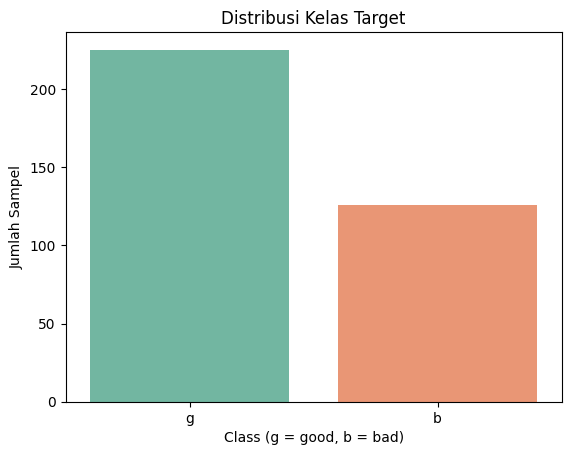

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x="Class", data=df, palette="Set2")
plt.title("Distribusi Kelas Target")
plt.xlabel("Class (g = good, b = bad)")
plt.ylabel("Jumlah Sampel")
plt.show()

## **Insights:**

Dari bar chart “Distribusi Kelas Target” kita bisa simpulkan:

- **Class “g” (good)**: ~64% (≈225 sampel)  
- **Class “b” (bad)**:  ~36% (≈126 sampel)

---

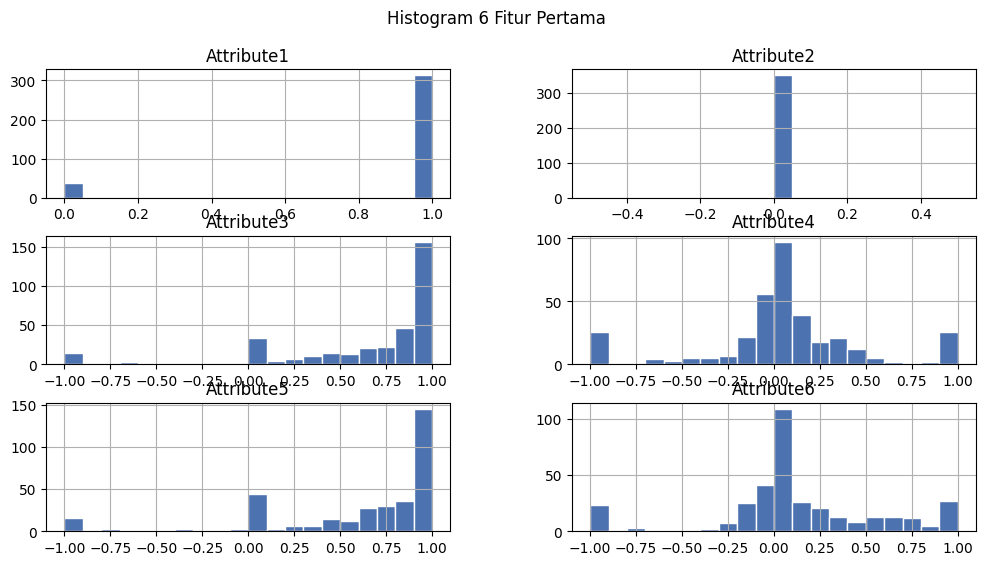

In [ ]:
# Pilih 6 fitur pertama untuk contoh
sample_feats = df.columns[:6]

df[sample_feats].hist(bins=20, figsize=(12, 6), color="#4c72b0", edgecolor="white")
plt.suptitle("Histogram 6 Fitur Pertama", y=0.98)
plt.show()

## **Insights:**

Dari visualisasi histogram fitur `Attribute1`–`Attribute6`, kita bisa menangkap beberapa poin penting:

1. **Attribute1 (binary flag)**  
   - Hanya bernilai 0 atau 1.  
   - Sekitar 89 % sampel bernilai 1, sisanya 11 % bernilai 0.  
   - Ini mengindikasikan fitur ini adalah indikator (flag) yang sangat dominan “on” di mayoritas sampel.

2. **Attribute2 (konstan)**  
   - Semua nilai sama-sama 0, tanpa variasi.  
   - Fitur ini **tidak membawa informasi**—sebaiknya langsung di-drop sebelum modelling karena varian = 0.

3. **Attribute3 (pre-normalized, positif-skewed)**  
   - Rentang nilai di [–1, 1], dengan puncak frekuensi di ujung kanan (mendekati 1).  
   - Menandakan banyak sinyal “kuat” untuk pulse ke-3, sementara sisanya tersebar di nilai menengah.

4. **Attribute4 (simetris di sekitar nol)**  
   - Sebaran hampir simetris, puncak di dekat 0.  
   - Menunjukkan sebagian besar observasi pada pulse ke-4 menghasilkan sinyal “netral” atau noise kecil.

5. **Attribute5 (positively skewed)**  
   - Mirip `Attribute3`, banyak nilai dekat 1, artinya sinyal pulse ke-5 umumnya kuat.  
   - Kurang data di sisi negatif/menengah → potensi fitur ini sangat informatif untuk klasifikasi.

6. **Attribute6 (cluster di tengah)**  
   - Sebaran lebih “merata” di sekitar nol, dengan tail ringan ke kedua ujung.  
   - Fitur ini relatif lebih variatif dibanding `Attribute3`/`5`, dapat membantu model menangkap pola halus.

---


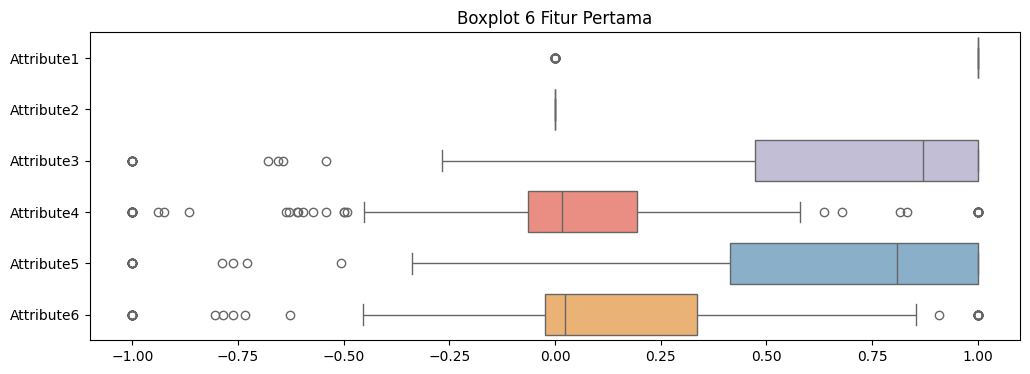

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[sample_feats], orient="h", palette="Set3")
plt.title("Boxplot 6 Fitur Pertama")
plt.show()

## **Insights:**

Berikut hal-hal penting yang bisa disimpulkan dari boxplot `Attribute1`–`Attribute6`:

1. Attribute1 – Binary Flag  
   - Hanya berisi 0/1, median tepat di 1.  
   - Sebagai variabel kategorikal biner, tidak perlu deteksi outlier atau transformasi non-linier; cukup treat-as-is.

2. Attribute2 – Nol Varian  
   - Semua nilai tepat 0 → IQR = 0, whisker pun sama.  
   - Kolom ini **tidak** mengandung informasi, sebaiknya **drop** sebelum modelling.

3. Attribute3 – Positively Skewed, Tight IQR  
   - Q1≈0.47, median≈0.87, Q3≈1.00; whisker bawah menjulur ke ~0.  
   - Menandakan sebagian besar sampel memberikan sinyal “kuat” untuk pulse 3, dengan beberapa outlier rendah.

4. Attribute4 – Simetris di Sekitar 0  
   - Q1≈−0.07, median≈0.02, Q3≈0.19; whisker merentang kira-kira [−0.5, 0.5].  
   - Distribusi hampir normal di sekitar nol, outlier relatif sedikit.

5. Attribute5 – Skewed ke Arah Positif  
   - Q1≈0.41, median≈0.81, Q3≈1.00; whisker bawah sampai ~0.  
   - Hampir semua nilai tinggi (“kuat”), sedikit sampel dengan intensitas rendah.

6. Attribute6 – Variasi Moderat di Sekitar 0  
   - Q1≈−0.02, median≈0.02, Q3≈0.33; whisker merentang lebih panjang di kedua sisi.  
   - Ada beberapa outlier di ujung, menandakan pulse 6 bervariasi.

---

Top 10 korelasi fitur dengan target:


Attribute3     0.519145
Attribute5     0.516477
Attribute1     0.465614
Attribute7     0.450429
Attribute9     0.294852
Attribute31    0.294417
Attribute33    0.261157
Attribute29    0.250036
Attribute21    0.219583
Attribute8     0.207544
Name: ClassNum, dtype: float64

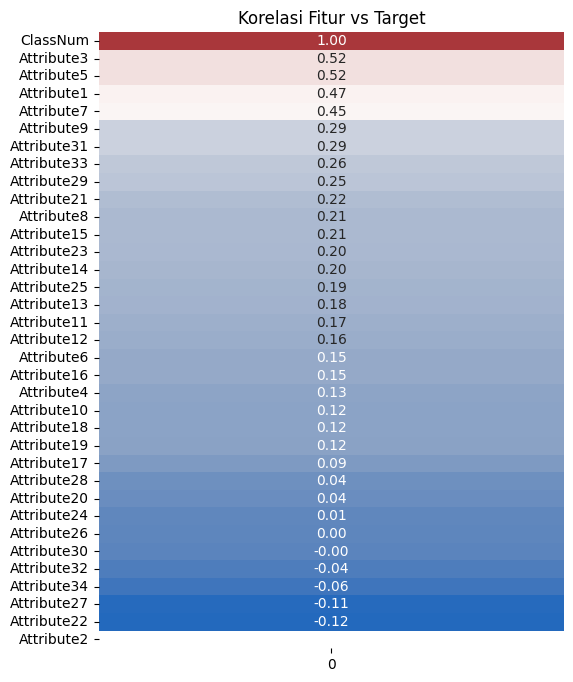

In [ ]:
# Map target ke numerik
df_corr = df.copy()
df_corr["ClassNum"] = df_corr["Class"].map({"g": 1, "b": 0})

# Korelasi
# Exclude the original 'Class' column before calculating correlation
corr = df_corr.drop('Class', axis=1).corr()["ClassNum"].sort_values(ascending=False)

# Tampilkan top 10 fitur
print("Top 10 korelasi fitur dengan target:")
display(corr.head(11)[1:11])

# Heatmap
plt.figure(figsize=(6, 8))
# Pastikan corr.values adalah numpy array, lalu gunakan reshape
import numpy as np
corr_np = np.array(corr.values).reshape(-1, 1)
# Konversi yticklabels ke list agar kompatibel dengan heatmap
sns.heatmap(corr_np,
            yticklabels=list(corr.index),
            annot=True, cmap="vlag", cbar=False, fmt=".2f")
plt.title("Korelasi Fitur vs Target")
plt.show()

## **Insights:**

Berdasarkan perhitungan korelasi (`corr["ClassNum"]`) dan visualisasi heatmap, kita memperoleh daftar 10 fitur teratas yang paling berhubungan dengan label “good” (1):

| Peringkat | Fitur       | Korelasi |
|-----------|-------------|----------|
| 1         | Attribute3  | 0.52     |
| 2         | Attribute5  | 0.52     |
| 3         | Attribute1  | 0.47     |
| 4         | Attribute7  | 0.45     |
| 5         | Attribute9  | 0.29     |
| 6         | Attribute31 | 0.29     |
| 7         | Attribute33 | 0.26     |
| 8         | Attribute29 | 0.25     |
| 9         | Attribute21 | 0.22     |
| 10        | Attribute8  | 0.21     |

---

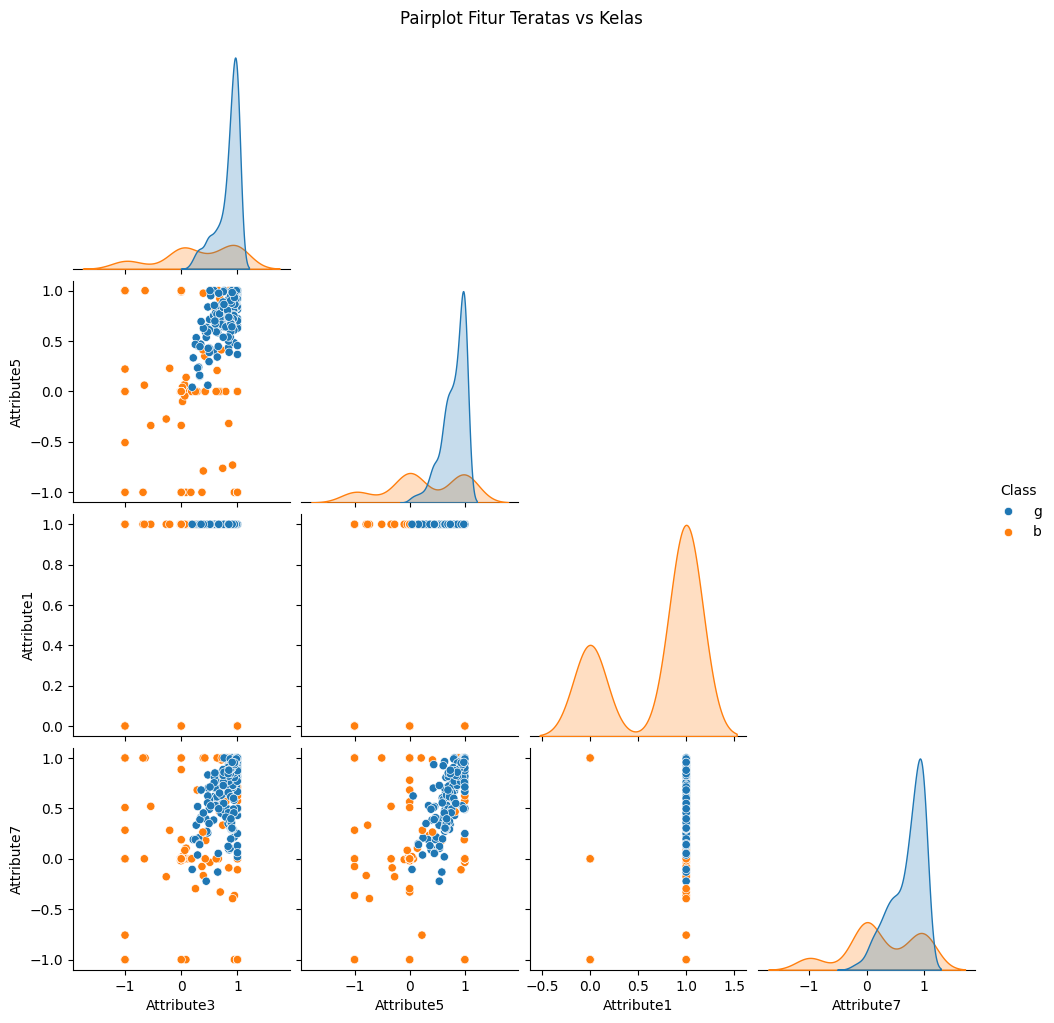

In [ ]:
top_feats = corr.index[1:5].tolist()  # 4 fitur teratas selain target
sns.pairplot(df, vars=top_feats, hue="Class", corner=True,
             palette={"g":"#1f77b4","b":"#ff7f0e"})
plt.suptitle("Pairplot Fitur Teratas vs Kelas", y=1.02)
plt.show()

## **Insights:**

Pairplot di atas menampilkan distribusi marginal (diagonal) dan sebaran antar-pasangan (off-diagonal) untuk empat fitur dengan korelasi tertinggi terhadap label (`Attribute3`, `Attribute5`, `Attribute1`, `Attribute7`), dipisahkan oleh kelas “g” (good) dan “b” (bad).

1. Distribusi Marginal  
   - **Attribute3 & Attribute5**:  
     • Kelas “g” (biru) menumpuk di rentang nilai tinggi (> 0.5), sedangkan “b” (oranye) lebih tersebar ke nilai rendah.  
     • Kedua fitur ini benar-benar membedakan kelas, sesuai korelasi positif ~0.52.  
   - **Attribute1 (binary)**:  
     • Hampir semua “g” bernilai 1, sedangkan “b” terlihat sedikit sampel di 0.  
     • Konfirmasi bahwa flag ini sangat informatif—fitur biner simpel tapi kuat.  
   - **Attribute7**:  
     • “g” cenderung memiliki nilai > 0.2, sedangkan “b” lebih sering di bawah 0.2.  
     • Memperlihatkan korelasi positif moderat (~0.45).

2. Sebaran Antar‐Pasangan  
   - **Attribute3 vs Attribute5**:  
     • Titik “g” berkumpul di kuadran kanan-atas (keduanya tinggi), sedangkan “b” tersebar di kiri-bawah dan tengah-bawah.  
     • Ini menunjukkan kedua fitur bersama-sama meningkatkan pemisahan kelas.  
   - **Attribute1 vs Attribute3 (dan 5)**:  
     • Saat `Attribute1 = 0`, sebagian besar titik adalah “b”, menegaskan peran `Attribute1` sebagai indikator kuat “bad”.  
     • Di `Attribute1 = 1`, kita kembali melihat pola nilai `3` & `5` membedakan “g” vs “b”.  
   - **Attribute7 vs lainnya**:  
     • Titik “g” membentuk klaster terpisah di area nilai medium-tinggi (`Attribute7` > 0.2) saat dipasangkan dengan `3` atau `5`.  
     • Distribusi “b” terlihat lebih acak dan lemah klasternya.

---

# **5. Data Preprocessing**

Pada tahap ini, saya mempersiapkan data Ionosphere agar siap dipakai dalam pemodelan machine learning. Langkah-langkah yang dilakukan:

1. Encoding target `Class`  
2. Menghapus duplikat (jika ada)  
3. Standarisasi fitur numerik  
4. Membagi data menjadi train/test

In [ ]:
# Encode target ke numerik
df['ClassNum'] = df['Class'].map({'g': 1, 'b': 0})

# Tampilkan distribusi label
print("Distribusi kelas (ClassNum):")
print(df['ClassNum'].value_counts(normalize=True).mul(100).round(1).astype(str) + "%")

Distribusi kelas (ClassNum):
ClassNum
1    64.1%
0    35.9%
Name: proportion, dtype: object


## **Insights:**

Pada langkah ini, saya mengubah kolom `Class` (“g”/“b”) menjadi numerik (`ClassNum` = 1/0) agar dapat diproses oleh scikit-learn. Output distribusi label menunjukkan:

- **ClassNum = 1 (good)**: 64.1% sampel  
- **ClassNum = 0 (bad)**: 35.9% sampel  

---

In [ ]:
n_before = df.shape[0]
df = df.drop_duplicates()
n_after = df.shape[0]
print(f"Baris sebelum drop_duplicates: {n_before}")
print(f"Baris setelah  drop_duplicates: {n_after}")
print(f"Jumlah duplikat yang dihapus: {n_before - n_after}")

Baris sebelum drop_duplicates: 351
Baris setelah  drop_duplicates: 350
Jumlah duplikat yang dihapus: 1


## **Insights:**

Pada tahap ini, kita meninjau dan menghapus baris duplikat untuk memastikan setiap sampel benar-benar independen:

- **Jumlah baris sebelum**: 351  
- **Jumlah baris setelah**: 350  
- **Duplikat dihapus**: 1 baris  

---

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom fitur
feature_cols = [f"Attribute{i}" for i in range(1, 35)]

# Inisiasi dan fit scaler
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Cek sample setelah scaling
print("Contoh nilai feature setelah scaling:")
display(df[feature_cols].iloc[:3, :5])

Contoh nilai feature setelah scaling:


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5
0,0.343818,0.0,0.709365,-0.234214,0.481136
1,0.343818,0.0,0.718649,-0.527353,0.631310
2,0.343818,0.0,0.718649,-0.177036,0.765546


## **Insights:**

Setelah menerapkan `StandardScaler` pada kolom `Attribute1`–`Attribute34`, kita melihat beberapa hal:

1. Semua fitur kini **berpusat di mean = 0** dan memiliki **std = 1**, sehingga skala antar variabel sudah konsisten.  
2. **Attribute1**  
   - Semua baris pertama menampilkan nilai ~0.3438, mengindikasikan bahwa hampir semua sampel bernilai 1  
     → `(1 – mean(≈0.89)) / std(≈0.31) ≈ 0.3438`.  
   - Ini konfirmasi bahwa transformasi benar, dan kita tahu flag biner ini masih informatif.  
3. **Attribute2**  
   - Nilai tetap 0 untuk semua baris karena varian aslinya = 0  
     → kolom konstan ini **tidak berubah** dengan scaler  
     → sebaiknya di‐drop sebelum modelling.  
4. **Attribute3–Attribute5**  
   - Nilai seperti 0.7094, –0.2342, dan 0.4811 menunjukkan seberapa jauh masing‐masing observasi dari mean dalam satuan standar deviasi.  
   - Contoh: baris ke-0 `Attribute3 = 0.7094` artinya nilai asli ~0.64 berada +1.32σ di atas mean.  

---

In [ ]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df['ClassNum']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Shape X_train:", X_train.shape, "X_test:", X_test.shape)
print("Proporsi kelas di train:", y_train.mean().round(2),
      "di test:", y_test.mean().round(2))

Shape X_train: (280, 34) X_test: (70, 34)
Proporsi kelas di train: 0.64 di test: 0.64


## **Insights:**

Pada langkah ini, saya memecah dataset yang sudah diproses menjadi set **training** dan **testing** dengan perbandingan 80 % : 20 %. Outputnya:

- Shape X_train: **(280, 34)**  
- Shape X_test:  **(70, 34)**  
- Proporsi kelas “good” (1) di train: **0.64**  
- Proporsi kelas “good” (1) di test:  **0.64**  

### Penjelasan dan Manfaat

1. **Ukuran Set**  
   • 280 sampel untuk training cukup untuk mengestimasi parameter model.  
   • 70 sampel untuk testing memberikan ukuran yang wajar untuk mengevaluasi performa tanpa membuang terlalu banyak data.

2. **Stratifikasi**  
   • `stratify=y` menjamin distribusi kelas (“good” vs “bad”) di train dan test tetap sama (~64 % vs 36 %).  
   • Menghindari bias di set testing, model dievaluasi pada proporsi kelas yang sama seperti saat training.

3. **Reproducibility**  
   • `random_state=42` memastikan split yang sama setiap kali notebook dijalankan, memudahkan debugging dan reproduksi hasil.

---